# Automation on drawing reading

**Author:** Farzad Kash 

**Contact:** Farzad.Kashefi@mattr.com  
**Affiliation:** Xerxed by Mattr  
**Date:** November 27, 2023


In [1]:
#import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
Edmonton_data = pd.read_clipboard()
Edmonton_data.head()

,SHELL ID#,Molding Date,Inspection date,Sprayer 1 Name,Sprayer 2 Name,Sprayer 3 Name,Resin batch #,Mold station #,Number of ribs,Mold type,Shell diameter,Tank Type,Resin Type,QC Name
0,91007504 A,12/20/22,01/04/23,Jonald,NaN,NaN,NaN,2,6.0,02-Steel,10.0,05-DW-UL/ULC,10-DION 490-27 WINTER,Nandish
1,91007504 B,12/20/22,01/04/23,NaN,NaN,NaN,NaN,3,6.0,02-Steel,10.0,05-DW-UL/ULC,10-DION 490-27 WINTER,Varghese
2,91007504 C,12/20/22,01/04/23,NaN,NaN,NaN,NaN,5,9.0,02-Steel,10.0,05-DW-UL/ULC,10-DION 490-27 WINTER,Varghese
3,91007503 B,12/19/22,01/04/23,Tuyen,Jonald,NaN,NaN,3,6.0,02-Steel,10.0,05-DW-UL/ULC,10-DION 490-27 WINTER,Edwin
4,91007502 B,12/21/22,01/04/23,Inderjeet,Mark,NaN,NaN,4,10.0,02-Steel,10.0,05-DW-UL/ULC,10-DION 490-27 WINTER,Edwin


In [25]:
Edmonton_data.shape

(2230, 14)

In [26]:
Edmonton_data.columns

Index(['SHELL ID#', 'Molding Date', 'Inspection date', 'Sprayer 1 Name',
       'Sprayer 2 Name', 'Sprayer 3 Name', 'Resin batch #', 'Mold station #',
       'Number of ribs', 'Mold type', 'Shell diameter', 'Tank Type',
       'Resin Type', 'QC Name'],
      dtype='object')

In [27]:
Edmonton_data.describe()

,Number of ribs,Shell diameter
count,2218.000000,2227.000000
mean,8.513526,9.429726
std,3.120645,1.162408
min,0.000000,4.000000
25%,6.000000,10.000000
50%,9.000000,10.000000
75%,11.000000,10.000000
max,16.000000,10.000000


In [28]:
Edmonton_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SHELL ID#        2230 non-null   object 
 1   Molding Date     2209 non-null   object 
 2   Inspection date  2229 non-null   object 
 3   Sprayer 1 Name   2191 non-null   object 
 4   Sprayer 2 Name   231 non-null    object 
 5   Sprayer 3 Name   4 non-null      object 
 6   Resin batch #    1 non-null      object 
 7   Mold station #   2183 non-null   object 
 8   Number of ribs   2218 non-null   float64
 9   Mold type        2229 non-null   object 
 10  Shell diameter   2227 non-null   float64
 11  Tank Type        2229 non-null   object 
 12  Resin Type       2230 non-null   object 
 13  QC Name          2229 non-null   object 
dtypes: float64(2), object(12)
memory usage: 244.0+ KB


In [44]:
# adding the column for number of sprayers worked on tank
def count_sprayers(row):
    count = sum(1 for sprayer in row[['Sprayer 1 Name', 'Sprayer 2 Name', 'Sprayer 3 Name']]if pd.notnull(sprayer))
    return count 

# Apply the function to each row to get the total number of sprayers worked
Edmonton_data['Total Sprayers Worked'] = Edmonton_data.apply(count_sprayers,axis=1)


In [45]:
Edmonton_data["Total Sprayers Worked"].describe()

count    2230.000000
mean        1.087892
std         0.342040
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Total Sprayers Worked, dtype: float64

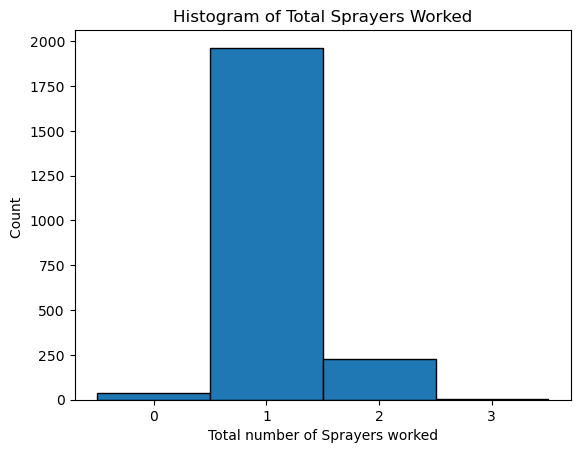

In [58]:
bins = np.arange(Edmonton_data["Total Sprayers Worked"].min(), Edmonton_data["Total Sprayers Worked"].max() + 1.5) - 0.5
plt.hist(Edmonton_data["Total Sprayers Worked"], bins=bins, edgecolor='black')
#plt.yscale('log')
plt.xticks(np.arange(Edmonton_data["Total Sprayers Worked"].min(), Edmonton_data["Total Sprayers Worked"].max() + 1, 1))

plt.xlabel("Total number of Sprayers worked")
plt.ylabel("Count ")
plt.title("Histogram of Total Sprayers Worked")
plt.show()

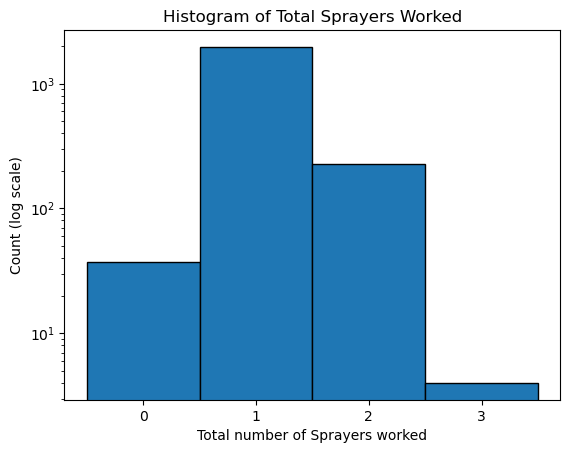

In [56]:
bins = np.arange(Edmonton_data["Total Sprayers Worked"].min(), Edmonton_data["Total Sprayers Worked"].max() + 1.5) - 0.5
plt.hist(Edmonton_data["Total Sprayers Worked"], bins=bins, edgecolor='black')
plt.yscale('log')
plt.xticks(np.arange(Edmonton_data["Total Sprayers Worked"].min(), Edmonton_data["Total Sprayers Worked"].max() + 1, 1))

plt.xlabel("Total number of Sprayers worked")
plt.ylabel("Count (log scale)")
plt.title("Histogram of Total Sprayers Worked")
plt.show()

In [40]:
Edmonton_data.shape

(2230, 15)

In [61]:
# checking the distribution of Resin Type:

Edmonton_data["Resin Type"].value_counts()

Resin Type
09- DION 490-28 SUMMER    1100
10-DION 490-27 WINTER      958
AOC RESIN                  144
09-DION 490-28 SUMMER       25
08- NSF RESIN                2
05-DW-UL/ULC                 1
Name: count, dtype: int64

there are multiplication for "09- DION 490-28 SUMMER" and "09-DION 490-28 SUMMER" than needs to be combined.


In [68]:
Edmonton_data["Resin Type"].replace(to_replace={"09-DION 490-28 SUMMER": "09- DION 490-28 SUMMER"}, inplace=True)

In [69]:
Edmonton_data["Resin Type"].value_counts()

Resin Type
09- DION 490-28 SUMMER    1125
10-DION 490-27 WINTER      958
AOC RESIN                  144
08- NSF RESIN                2
05-DW-UL/ULC                 1
Name: count, dtype: int64

In [71]:
Edmonton_data.describe()

,Number of ribs,Shell diameter,Total Sprayers Worked
count,2218.000000,2227.000000,2230.000000
mean,8.513526,9.429726,1.087892
std,3.120645,1.162408,0.342040
min,0.000000,4.000000,0.000000
25%,6.000000,10.000000,1.000000
50%,9.000000,10.000000,1.000000
75%,11.000000,10.000000,1.000000
max,16.000000,10.000000,3.000000


In [75]:
Edmonton_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SHELL ID#              2230 non-null   object 
 1   Molding Date           2209 non-null   object 
 2   Inspection date        2229 non-null   object 
 3   Sprayer 1 Name         2191 non-null   object 
 4   Sprayer 2 Name         231 non-null    object 
 5   Sprayer 3 Name         4 non-null      object 
 6   Resin batch #          1 non-null      object 
 7   Mold station #         2183 non-null   object 
 8   Number of ribs         2218 non-null   float64
 9   Mold type              2229 non-null   object 
 10  Shell diameter         2227 non-null   float64
 11  Tank Type              2229 non-null   object 
 12  Resin Type             2230 non-null   object 
 13  QC Name                2229 non-null   object 
 14  Total Sprayers Worked  2230 non-null   int64  
dtypes: f

In [82]:
#converting types:
Edmonton_data["Molding Date"]=pd.to_datetime(Edmonton_data["Molding Date"], errors='coerce')
Edmonton_data["Inspection date"]=pd.to_datetime(Edmonton_data["Inspection date"], errors='coerce')
Edmonton_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   SHELL ID#              2230 non-null   object        
 1   Molding Date           2207 non-null   datetime64[ns]
 2   Inspection date        2229 non-null   datetime64[ns]
 3   Sprayer 1 Name         2191 non-null   object        
 4   Sprayer 2 Name         231 non-null    object        
 5   Sprayer 3 Name         4 non-null      object        
 6   Resin batch #          1 non-null      object        
 7   Mold station #         2183 non-null   object        
 8   Number of ribs         2218 non-null   float64       
 9   Mold type              2229 non-null   object        
 10  Shell diameter         2227 non-null   float64       
 11  Tank Type              2229 non-null   object        
 12  Resin Type             2230 non-null   object        
 13  QC 

In [91]:
Edmonton_data['Mold station #'].value_counts()

Mold station #
1           466
3           443
5           432
2           409
4           379
6            45
7             4
4' Mold       3
01/05/00      1
10            1
Name: count, dtype: int64

In [101]:
Edmonton_data["Mold station #"].values

array(['2', '3', '5', ..., '2', '4', '5'], dtype=object)

In [119]:
Edmonton_data['Mold station #'] = pd.to_numeric(Edmonton_data['Mold station #'], errors='coerce')

In [120]:
Edmonton_data["Mold station #"].values

array([2., 3., 5., ..., 2., 4., 5.])

In [121]:
Edmonton_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   SHELL ID#              2230 non-null   object        
 1   Molding Date           2207 non-null   datetime64[ns]
 2   Inspection date        2229 non-null   datetime64[ns]
 3   Sprayer 1 Name         2191 non-null   object        
 4   Sprayer 2 Name         231 non-null    object        
 5   Sprayer 3 Name         4 non-null      object        
 6   Resin batch #          1 non-null      object        
 7   Mold station #         2179 non-null   float64       
 8   Number of ribs         2218 non-null   float64       
 9   Mold type              2229 non-null   object        
 10  Shell diameter         2227 non-null   float64       
 11  Tank Type              2229 non-null   object        
 12  Resin Type             2230 non-null   object        
 13  QC 

**Resin batch #** is empty

In [70]:
Edmonton_data.head()

,SHELL ID#,Molding Date,Inspection date,Sprayer 1 Name,Sprayer 2 Name,Sprayer 3 Name,Resin batch #,Mold station #,Number of ribs,Mold type,Shell diameter,Tank Type,Resin Type,QC Name,Total Sprayers Worked
0,91007504 A,12/20/22,01/04/23,Jonald,NaN,NaN,NaN,2,6.0,02-Steel,10.0,05-DW-UL/ULC,10-DION 490-27 WINTER,Nandish,1
1,91007504 B,12/20/22,01/04/23,NaN,NaN,NaN,NaN,3,6.0,02-Steel,10.0,05-DW-UL/ULC,10-DION 490-27 WINTER,Varghese,0
2,91007504 C,12/20/22,01/04/23,NaN,NaN,NaN,NaN,5,9.0,02-Steel,10.0,05-DW-UL/ULC,10-DION 490-27 WINTER,Varghese,0
3,91007503 B,12/19/22,01/04/23,Tuyen,Jonald,NaN,NaN,3,6.0,02-Steel,10.0,05-DW-UL/ULC,10-DION 490-27 WINTER,Edwin,2
4,91007502 B,12/21/22,01/04/23,Inderjeet,Mark,NaN,NaN,4,10.0,02-Steel,10.0,05-DW-UL/ULC,10-DION 490-27 WINTER,Edwin,2


# Adding rework data

In [122]:
Edmonton_rework = pd.read_clipboard()
Edmonton_rework.head()

,SHELL,ID#,Molding,Date,Inspection,date,Sprayer,1,Name,Sprayer.1,...,pin.1,hole.1,leak-outside,fast,leak-inside.1,fast.1,leak-outside.1,"""Repaired",Area,(SQ.FT)
0,"INNER""","""Repaired",Area,(SQ.FT),None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"OUTER""",Mold,Mark,Sq-FT,Rework,Hours,Rework,in,Minutes,Inches,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"TOTAL""","""repaired",area,inner+outer+mold,marks,(SQ.FT),None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"TOTAL""",Count,Estimated,Shell,Area,Rework,Rate,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,91007504,A,12/20/22,01/04/23,Jonald,2,6,02-Steel,10,05-DW-UL/ULC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Edmonton_data_original = Edmonton_data.copy()
Edmonton_data = Edmonton_data['SHELL ID#', 'Molding Date', 'Inspection date', 'Sprayer 1 Name',
       'Sprayer 2 Name', 'Sprayer 3 Name', 'Resin batch #', 'Mold station #',
       'Number of ribs', 'Mold type', 'Shell diameter', 'Tank Type',
       'Resin Type']